In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [2]:
# Step 1: Load data
df = pd.read_csv("sales_data_sample.csv", encoding='unicode_escape')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [3]:
# Step 2: Create RFM (Recency, Frequency, Monetary)
snapshot = df['ORDERDATE'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (snapshot - x.max()).days,
    'ORDERNUMBER': 'nunique',
    'SALES': 'sum'
}).rename(columns={'ORDERDATE':'Recency','ORDERNUMBER':'Frequency','SALES':'Monetary'})

In [4]:
# Step 3: Scale data
scaler = StandardScaler()
X = scaler.fit_transform(rfm)

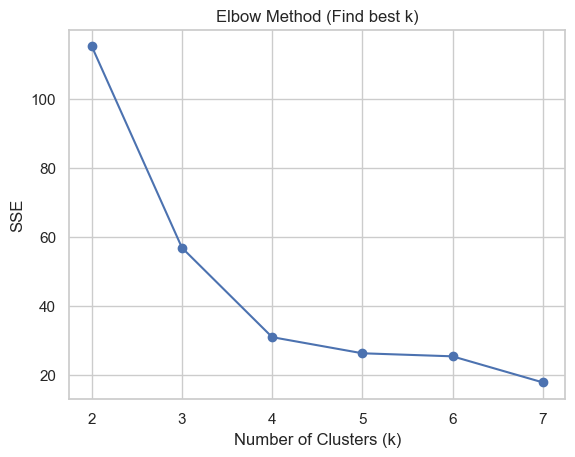

In [5]:
# Step 4: Elbow Method
sse = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(2,8), sse, marker='o')
plt.title("Elbow Method (Find best k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.show()

In [6]:
# Step 5: Apply KMeans with k=4 (example)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X)

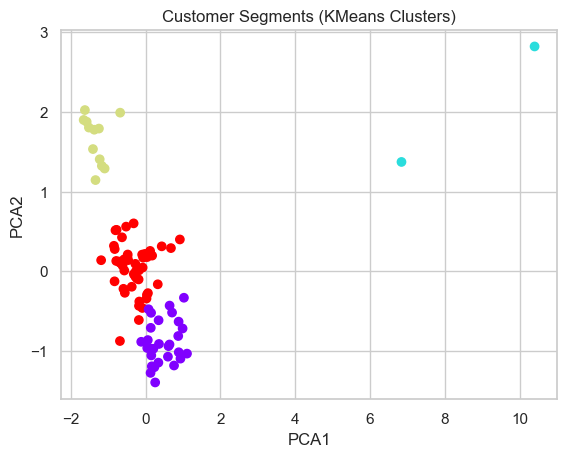

In [7]:
# Step 6: Visualize clusters (using PCA)
pca = PCA(2)
pca_data = pca.fit_transform(X)
plt.scatter(pca_data[:,0], pca_data[:,1], c=rfm['Cluster'], cmap='rainbow')
plt.title("Customer Segments (KMeans Clusters)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [8]:
# Show cluster info
print(rfm.groupby('Cluster').mean().round(2))


         Recency  Frequency   Monetary
Cluster                               
0          51.97       3.52  114589.80
1           2.00      21.50  783576.08
2         449.17       2.08   65294.09
3         202.43       2.80   88955.99
